# <span style="color:blue">Tutorial series: using pyPAHdb to analyze astronomical spectra.</span>

# Tutorial 01: a single Spitzer spectrum.

We begin this series by performing a simple analysis of a single astronomical spectrum. We will use one of the sample spectra here. Feel free to follow along, and attempt the same method with a simple spectrum of your own.

Data used in this example: pyPAHdb/tests/data/NGC7023-NW-PAHs.txt

***

## <span style="color:blue">Step 1</span>: Necessary modules and paths

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pypahdb

# The below command will suppress the shell output, since we are using
# matplotlib within a notebook.
%matplotlib inline

We'll dynamically determine the location containing our tests data:

In [2]:
# Identify the path to the folder containing the test data we are going to use.
# In your usage, 
package_dir = os.path.dirname(os.path.abspath(pypahdb.__file__))
data_dir = package_dir + '/tests/data/'
data_dir

'/Users/mjshanno/Documents/GitHub/pyPAHdb/pypahdb/tests/data/'

***

## <span style="color:blue">Step 2</span>: Preparing the data

You should ensure your data has a simple format. Acceptable formats include:

- FITS
    - ...
    
- ASCII
    - either two-column (wavelength, flux) or three-column (wavelength, flux, flux error)
    - seperated by commas (CSV) or single spaces
    - ***what about headers?? do we use skiprows in pypahdb right now??***

### Load the data

We will use the example spectrum ``NGC7023-NW-PAHs.txt`` here.

In [3]:
# Loading from the data directory. For your uses, point to the location
# of the spectrum you are examining.
data_file = data_dir + 'NGC7023-NW-PAHs.txt'

Let's examine the first few lines of this file so we understand its structure...

In [4]:
for index, line in enumerate(open(data_file, 'r')):
    print(line, end='')
    if index >= 3:
        break

wavelength "surface brightness"
5.24282 50.918551188790325
5.2738 53.081826767577795
5.30479 55.46148169840347


So we have two columns separated by a space, the first being wavelength
and the second being surface brightness (for convenience we'll call this
flux). The line breaks (\n) will be handled easily by np.loadtxt (or any other module you desire):

In [5]:
wave, flux = np.loadtxt(data_file, delimiter=' ', dtype='float', skiprows=1).T

We used .T to transpose the array (such that it's column-oriented).

Now let's check its dimensions and type(s).

In [6]:
len(wave), len(flux), type(wave), type(wave[0]), type(flux[0])

(194, 194, numpy.ndarray, numpy.float64, numpy.float64)

### Examine the data

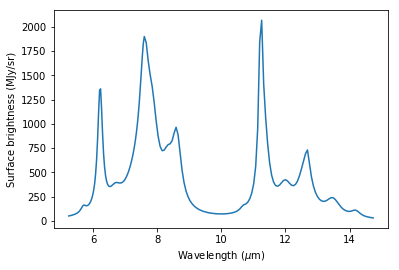

In [7]:
plt.plot(wave, flux);
plt.xlabel(r'Wavelength ($\mu$m)');
plt.ylabel('Surface brightness (MJy/sr)');

We see that it is a reasonably smooth spectrum composed of Spitzer/IRS
observations using the SL module (SL1 and SL2, covering ~5-14 microns approximately).

The data needs to be monotonic, i.e. not double-valued or out of order (as determined by the wavelength array).

In [8]:
def strictly_increasing(L):
    return all(x<y for x, y in zip(L, L[1:]))

strictly_increasing(wave)

True

***

## <span style="color:blue">Step 3</span>: Running pyPAHdb (short version)

### 1. Instantiate an ``observation`` object

All that's needed is the path to the text file above.
** can it accept both space and CSV files ???? **

In [9]:
observation = pypahdb.observation(data_file)

Empty or corrupt FITS file


    Header size is not multiple of 2880: 5117
There may be extra bytes after the last HDU or the file is corrupted. [astropy.io.fits.hdu.hdulist]


In [10]:
observation.file_path

'/Users/mjshanno/Documents/GitHub/pyPAHdb/pypahdb/tests/data/NGC7023-NW-PAHs.txt'

Now we have an ``observation`` object that encapsulates our data.

### 2. Pass the spectrum to ``decomposer``

Now with our ``observation`` instance, we simply pass its spectrum to the pyPAHdb ``decomposer``, which will perform the decomposition by PAH.

** seems like you shouldn't need to specify observation.spectrum?? just observation? or...? **

In [48]:
result = pypahdb.decomposer(observation.spectrum)

Now we have a ``decomposer`` object that encapsulates the fit.

### 3. Plot and save the results using ``writer``

``pypahdb.writer`` is a convenient way to view and save your results.

In [63]:
# write results to file
pypahdb.writer(result, opdf=False,
               basename=observation.file_path.split('.txt')[0] + '_')

***GET WORKING WITH opdf=TRUE!!!!!***

***

## <span style="color:blue">Step 3</span>: Running pyPAHdb (long version with details)

### 1. Instantiate an ``observation`` object

All that's needed is the path to the text file above.
** can it accept both space and CSV files ???? **

In [32]:
observation = pypahdb.observation(data_file)

Now we have an ``observation`` object that encapsulates our data.

In [34]:
observation.file_path

'NGC7023-NW-PAHs.txt'

The wavelength array is contained within ``observation.spectrum.abscissa``.

In [46]:
type(observation.spectrum.abscissa)

numpy.ndarray

In [45]:
observation.spectrum.abscissa[:10]

array([5.24282, 5.2738 , 5.30479, 5.33577, 5.36676, 5.39774, 5.42873,
       5.45971, 5.4907 , 5.52169])

In [47]:
observation.spectrum.abscissa.shape

(194,)

The flux array is within ``observation.spectrum.ordinate``.

In [42]:
type(observation.spectrum.ordinate)

numpy.ndarray

In [43]:
observation.spectrum.ordinate.shape

(194, 1, 1)

### 2. Pass the spectrum to ``decomposer``

Now with our ``observation`` instance, we simply pass its spectrum to the pyPAHdb ``decomposer``, which will perform the decomposition by PAH.

** seems like you shouldn't need to specify observation.spectrum?? just observation? or...? **

In [48]:
result = pypahdb.decomposer(observation.spectrum)

In [49]:
type(result)

pypahdb.decomposer.decomposer

In [51]:
type(result.charge)

dict

In [53]:
type(result.fit)

numpy.ndarray

In [54]:
type(result.ionized_fraction)

numpy.ndarray

In [55]:
type(result.large_fraction)

numpy.ndarray

In [56]:
type(result.norm)

numpy.ndarray

In [57]:
type(result.size)

dict

In [58]:
type(result.spectrum)

pypahdb.spectrum.spectrum

***